In [13]:
import pandas as pd

# Especifica la ruta del archivo Excel
archivo_excel = "spotify.xlsx"

# Carga la hoja de Excel en un DataFrame de pandas
df = pd.read_excel(archivo_excel)

# Mapea los nombres de las columnas originales a sus traducciones en español
nombres_columnas = {
    'artist': 'artista',
    'song': 'cancion',
    'duration_ms': 'duracion_ms',
    'explicit': 'explicito',
    'year': 'anio',
    'popularity': 'popularidad',
    'danceability': 'bailable',
    'energy': 'energia',
    'key': 'clave',
    'loudness': 'volumen',
    'mode': 'modo',
    'speechiness': 'locuacidad',
    'acousticness': 'acusticidad',
    'instrumentalness': 'instrumentalidad',
    'liveness': 'vivisidad',
    'valence': 'valencia emocional',
    'tempo': 'tempo',
    'genre': 'genero'
}

# Renombra las columnas usando el mapeo
df.rename(columns=nombres_columnas, inplace=True)

# Diccionario de mapeo de números a notas musicales
mapeo_clave = {
    0: 'DO',
    1: 'DO#',
    2: 'RE',
    3: 'RE#',
    4: 'MI',
    5: 'FA',
    6: 'FA#',
    7: 'SOL',
    8: 'SOL#',
    9: 'LA',
    10: 'LA#',
    11: 'SI'
}

# Aplica el mapeo a la columna "clave" y crea una nueva columna "nota_clave"
df['nota_clave'] = df['clave'].map(mapeo_clave)

# Reorganiza las columnas para que "nota_clave" esté en la posición correcta
columnas = ['artista', 'cancion', 'duracion_ms', 'explicito', 'anio', 'popularidad', 'bailable', 'energia', 'clave', 'nota_clave', 'volumen', 'modo', 'locuacidad', 'acusticidad', 'instrumentalidad', 'vivisidad', 'valencia emocional', 'tempo', 'genero']

# Reordena las columnas del DataFrame
datos_songs = df[columnas]

# Muestra las primeras filas del DataFrame con los nombres de las columnas traducidos
datos_songs.head()



,artista,cancion,duracion_ms,explicito,anio,popularidad,bailable,energia,clave,nota_clave,volumen,modo,locuacidad,acusticidad,instrumentalidad,vivisidad,valencia emocional,tempo,genero
0,Britney Spears,"Oops!,,,I Did It Again",211160,FALSO,2000,77,0.751,0.834,1,DO#,-5.444,0,0.437,0.003,0.000018,0.355,0.894,95.053,pop
1,blink-182,All The Small Things,167066,FALSO,1999,79,0.434,0.897,0,DO,-4.918,1,0.488,0.103,0.000000,0.612,0.684,148.726,rock
2,Faith Hill,Breathe,250546,FALSO,1999,66,0.529,0.496,7,SOL,-9.007,1,0.029,0.173,0.000000,0.251,0.278,136.859,pop
3,Bon Jovi,It's My Life,224493,FALSO,2000,78,0.551,0.913,0,DO,-4.063,0,0.466,0.263,0.000013,0.347,0.544,119.992,rock
4,*NSYNC,Bye Bye Bye,200560,FALSO,2000,65,0.614,0.928,8,SOL#,-4.806,0,0.516,0.408,0.001040,0.845,0.879,172.656,pop


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
#Verificar presencia de valores nulos y duplicados
# Verificar duplicados
duplicados = datos_songs.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# Verificar nulos
nulos = datos_songs.isnull().sum()
print("Número de valores nulos por columna:")
print(nulos)


Número de filas duplicadas: 0
Número de valores nulos por columna:
artista               0
cancion               0
duracion_ms           0
explicito             0
anio                  0
popularidad           0
bailable              0
energia               0
clave                 0
nota_clave            0
volumen               0
modo                  0
locuacidad            0
acusticidad           0
instrumentalidad      1
vivisidad             0
valencia emocional    0
tempo                 0
genero                0
dtype: int64


In [27]:
import pandas as pd

# Eliminar valores duplicados
datos_songs.drop_duplicates(inplace=True)

# Eliminar filas con valores nulos
datos_songs.dropna(inplace=True)

# Verificar si aún hay duplicados
duplicados = datos_songs.duplicated().sum()
print(f"Número de filas duplicadas después de eliminar duplicados y nulos: {duplicados}")

# Verificar si hay filas con valores nulos
nulos = datos_songs.isnull().sum().sum()
print(f"Número de valores nulos después de eliminar duplicados y nulos: {nulos}")



Número de filas duplicadas después de eliminar duplicados y nulos: 0
Número de valores nulos después de eliminar duplicados y nulos: 0


<ipython-input-27-6f3d48fc81de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_songs.drop_duplicates(inplace=True)
<ipython-input-27-6f3d48fc81de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_songs.dropna(inplace=True)


In [34]:
# Contar el número total de registros en cada columna, incluyendo los nulos
total_registros = datos_songs.shape[0]

# Contar el número de valores no nulos en cada columna
valores_no_nulos = datos_songs.count()

# Imprimir el total de registros y el número de valores no nulos para cada columna
print("Número total de registros en el DataFrame:", total_registros)
print("\nNúmero de valores no nulos en cada columna:")
print(valores_no_nulos)

# Para ver cuántos registros tienen valores nulos en cada columna
valores_nulos = total_registros - valores_no_nulos
print("\nNúmero de valores nulos en cada columna:")
print(valores_nulos)


Número total de registros en el DataFrame: 1925

Número de valores no nulos en cada columna:
artista               1925
cancion               1925
duracion_ms           1925
explicito             1925
anio                  1925
popularidad           1925
bailable              1925
energia               1925
clave                 1925
nota_clave            1925
volumen               1925
modo                  1925
locuacidad            1925
acusticidad           1925
instrumentalidad      1925
vivisidad             1925
valencia emocional    1925
tempo                 1925
genero                1925
dtype: int64

Número de valores nulos en cada columna:
artista               0
cancion               0
duracion_ms           0
explicito             0
anio                  0
popularidad           0
bailable              0
energia               0
clave                 0
nota_clave            0
volumen               0
modo                  0
locuacidad            0
acusticidad           0
ins

In [28]:
#estadísticos para las variables numéricas
estadisticas_numericas = datos_songs.describe()
print(estadisticas_numericas)



         duracion_ms         anio  popularidad     bailable      energia  \
count    1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean   228668.634286  2009.487792    59.657143     0.607280     0.656745   
std     39293.681728     5.874863    21.441402     0.226832     0.245218   
min    113000.000000  1998.000000     0.000000     0.004000     0.004000   
25%    203520.000000  2004.000000    56.000000     0.535000     0.572000   
50%    223266.000000  2010.000000    65.000000     0.661000     0.716000   
75%    248066.000000  2015.000000    73.000000     0.754000     0.833000   
max    484146.000000  2020.000000    89.000000     0.975000     0.999000   

             clave      volumen         modo   locuacidad  acusticidad  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean      5.364156    -5.031660     0.553766     0.376673     0.356154   
std       3.616471     2.344846     0.497230     0.233340     0.256533   
min       0.000000 

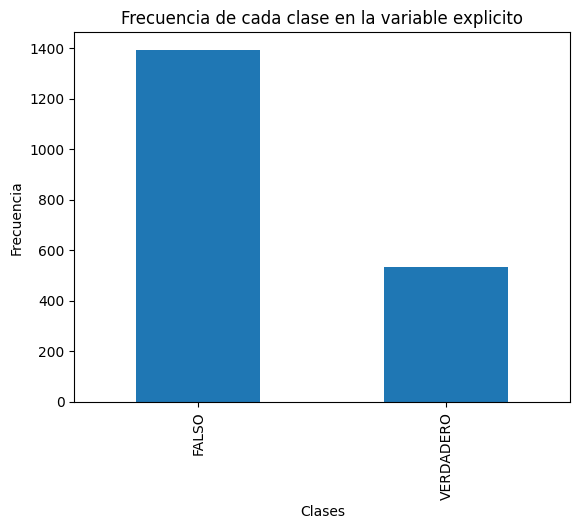

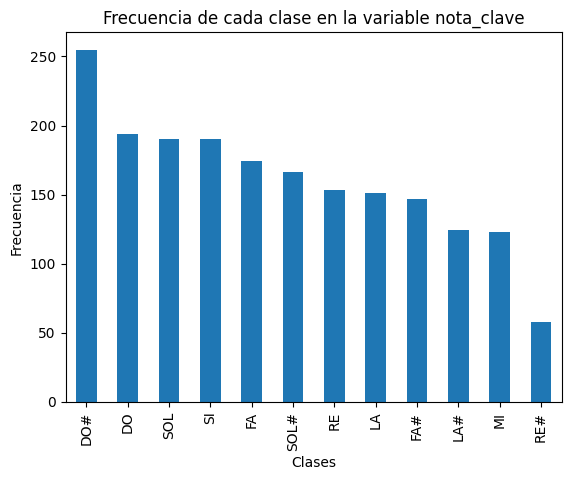

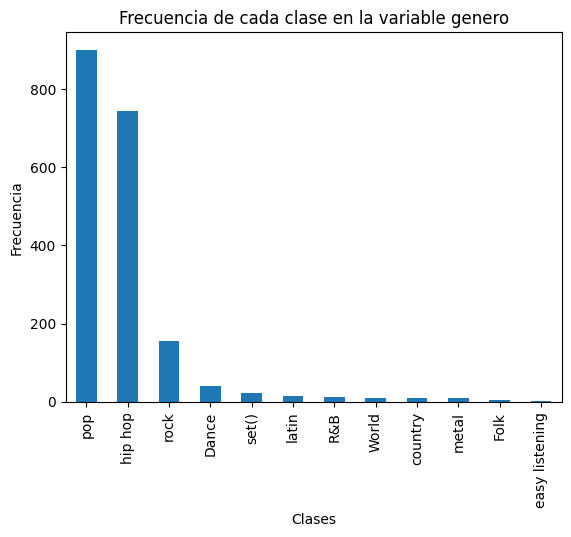

In [30]:
import matplotlib.pyplot as plt

# Filtrar las columnas no numéricas, excluyendo 'cancion' y 'artista' por la alta cardinalidad
columnas_no_numericas = datos_songs.select_dtypes(include=['object']).columns
columnas_no_numericas = [col for col in columnas_no_numericas if col not in ['cancion', 'artista']]

# Crear histogramas para cada columna no numérica
for columna in columnas_no_numericas:
    datos_songs[columna].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de cada clase en la variable {columna}')
    plt.xlabel('Clases')
    plt.ylabel('Frecuencia')
    plt.show()



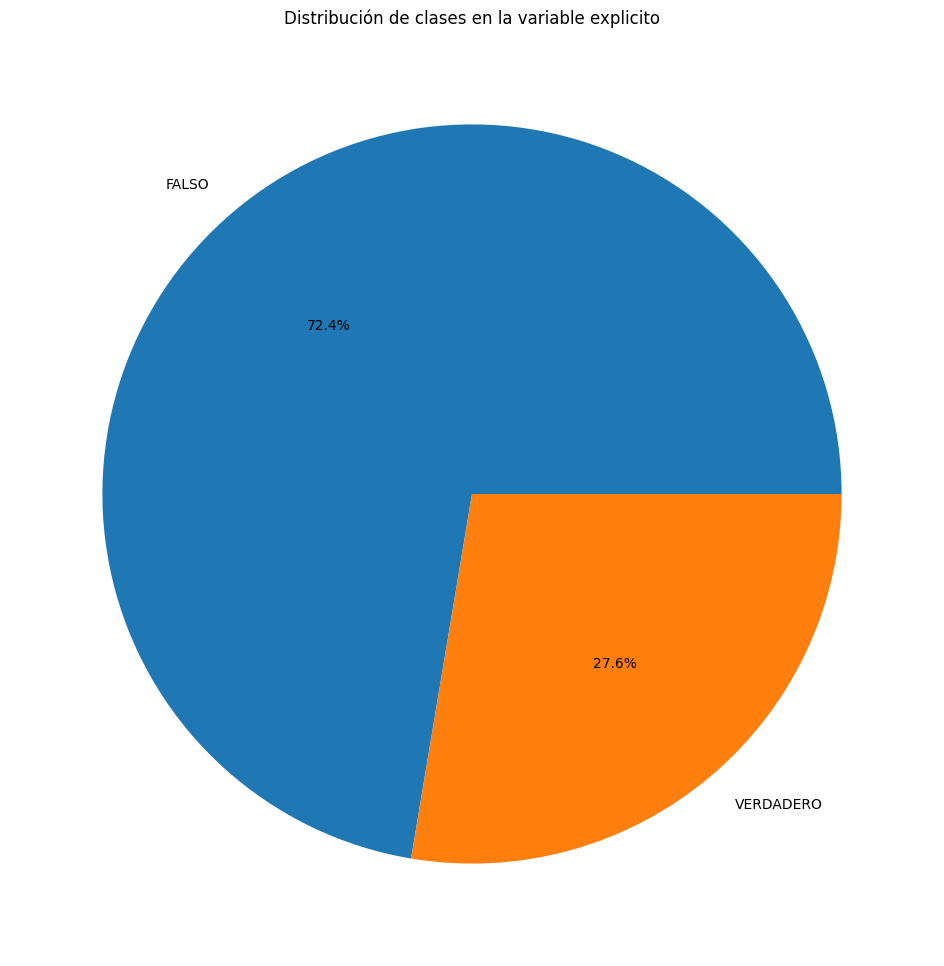

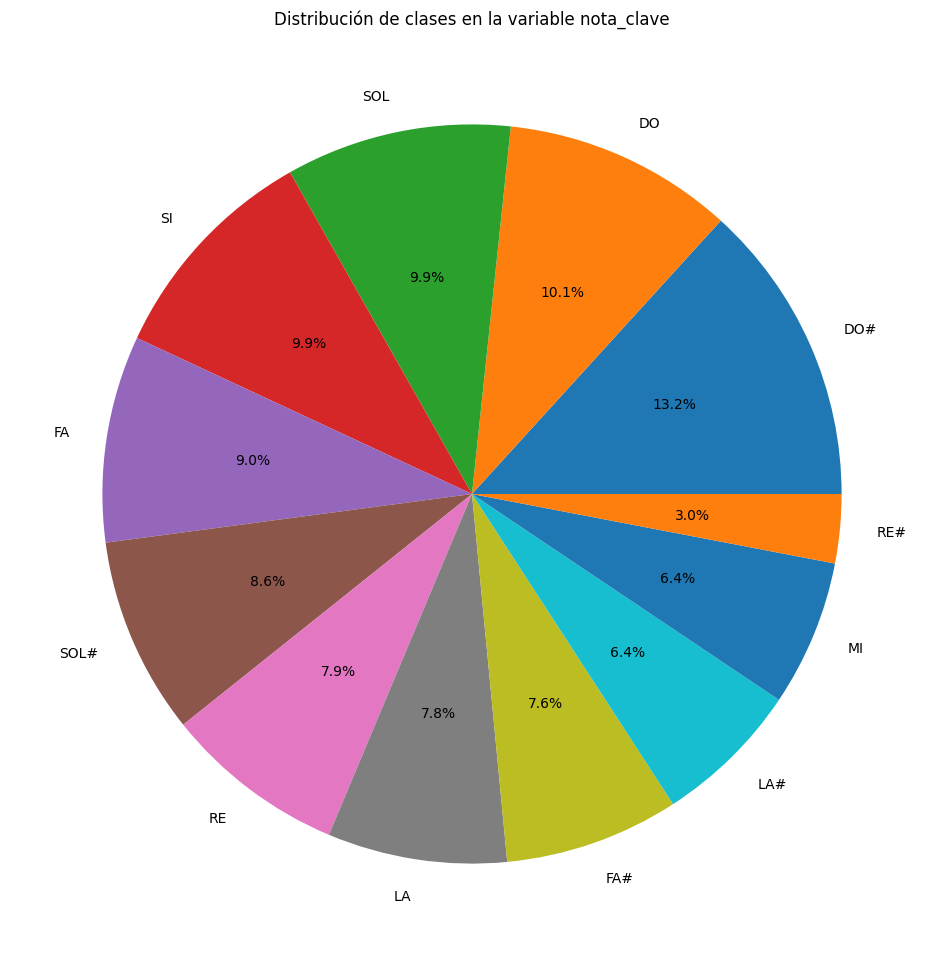

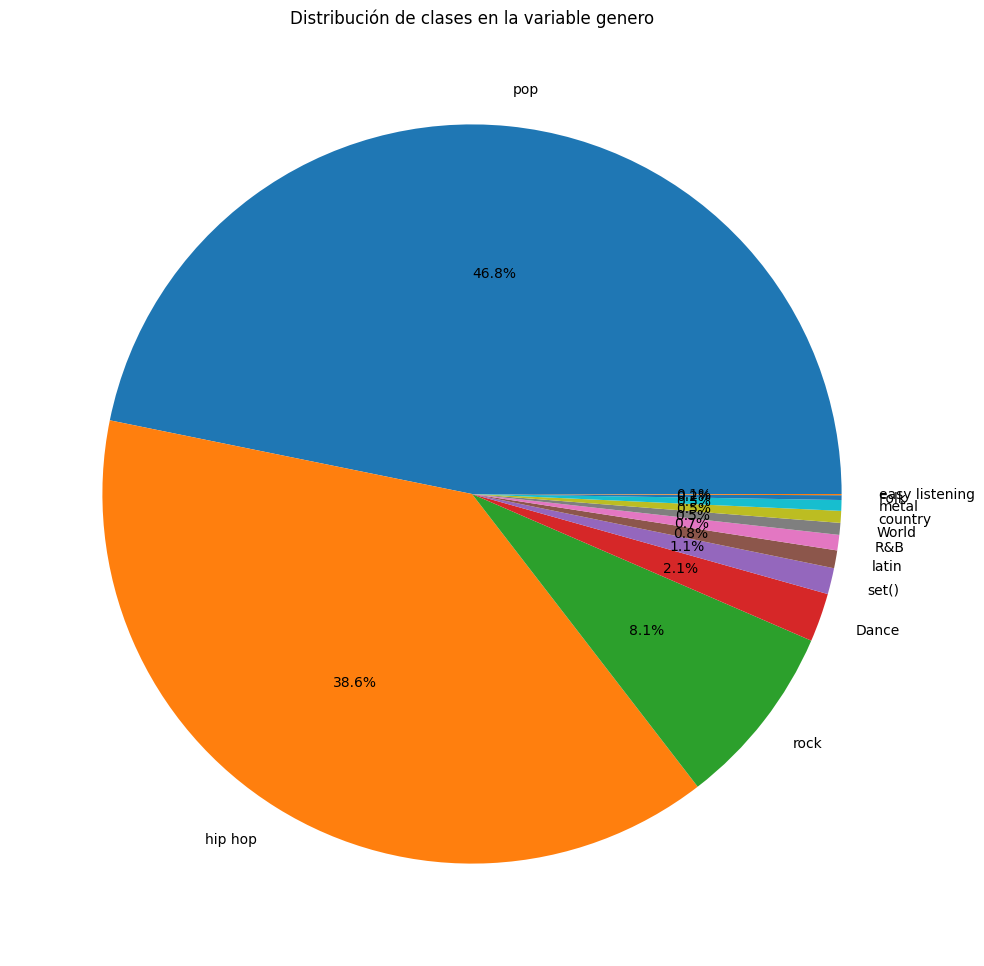

In [32]:
import matplotlib.pyplot as plt

# Filtrar las columnas no numéricas, excluyendo las columnas 'artista' y 'cancion'
columnas_no_numericas = datos_songs.select_dtypes(include=['object']).columns
columnas_no_numericas = [col for col in columnas_no_numericas if col not in ['artista', 'cancion']]

# Crear diagramas de torta para cada columna no numérica
for columna in columnas_no_numericas:
    # Contar los valores de cada categoría
    conteo = datos_songs[columna].value_counts()

    # Crear el diagrama de torta
    plt.figure(figsize=(14, 12))
    conteo.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribución de clases en la variable {columna}')
    plt.ylabel('')  # Opcional: para ocultar la etiqueta del eje y
    plt.show()



In [33]:
# Crear una tabla de frecuencias para la variable 'genero'
tabla_genero = datos_songs['genero'].value_counts()

# Mostrar la tabla
print(tabla_genero)
len(tabla_genero)

genero
pop               901
hip hop           744
rock              155
Dance              41
set()              22
latin              15
R&B                13
World              10
country            10
metal               9
Folk                4
easy listening      1
Name: count, dtype: int64


12

In [23]:
#Análisis de variable cancionque tiene un numero elevado de clases
# Crear una tabla de frecuencias para la variable 'cancion'
tabla_cancion = datos_songs['cancion'].value_counts()

# Mostrar la tabla
print(tabla_cancion)
len(tabla_cancion)


cancion
Sorry                            4
Higher                           3
I Like It                        3
Closer                           3
Faded                            3
                                ..
Check On It (feat, Slim Thug)    1
Life is a Highway                1
When The Sun Goes Down           1
Chain Hang Low                   1
Circles                          1
Name: count, Length: 1879, dtype: int64


1879

In [35]:
# Crear una tabla de frecuencias para la variable 'cancion'
tabla_cancion = datos_songs['cancion'].value_counts()

# Filtrar las canciones que se repiten solo una vez
canciones_unicas = tabla_cancion[tabla_cancion == 1]

# Contar cuántas canciones se repiten solo una vez
num_canciones_unicas = len(canciones_unicas)

# Mostrar el resultado
print(f"Número de canciones que se repiten solo una vez: {num_canciones_unicas}")


Número de canciones que se repiten solo una vez: 1838


In [24]:
#Análisis de variable artista que tiene un numero elevado de clases
# Crear una tabla de frecuencias para la variable 'artista'
tabla_artista = datos_songs['artista'].value_counts()

# Mostrar la tabla
print(tabla_artista)


artista
Rihanna           23
Drake             21
Eminem            20
Calvin Harris     20
Britney Spears    19
                  ..
A1                 1
Mumford & Sons     1
Asher Roth         1
Shinedown          1
Blanco Brown       1
Name: count, Length: 835, dtype: int64


In [26]:
# Tabla de frecuencias relativas para 'cancion'
tabla_cancion_relativa = datos_songs["cancion"].value_counts(normalize=True) * 100
print(tabla_cancion_relativa)


cancion
Sorry                            0.207684
Higher                           0.155763
I Like It                        0.155763
Closer                           0.155763
Faded                            0.155763
                                   ...   
Check On It (feat, Slim Thug)    0.051921
Life is a Highway                0.051921
When The Sun Goes Down           0.051921
Chain Hang Low                   0.051921
Circles                          0.051921
Name: proportion, Length: 1879, dtype: float64


In [25]:
# Tabla de frecuencias relativas para 'artista'
tabla_artista_relativa = datos_songs["artista"].value_counts(normalize=True) * 100
print(tabla_artista_relativa)

artista
Rihanna           1.194185
Drake             1.090343
Eminem            1.038422
Calvin Harris     1.038422
Britney Spears    0.986501
                    ...   
A1                0.051921
Mumford & Sons    0.051921
Asher Roth        0.051921
Shinedown         0.051921
Blanco Brown      0.051921
Name: proportion, Length: 835, dtype: float64


In [39]:
import pandas as pd

# Crear una tabla de frecuencias para la variable 'artista'
tabla_artista = datos_songs['artista'].value_counts()

# Definir los rangos de frecuencia, ajustando el último bin si es necesario
max_frecuencia = max(tabla_artista)
if max_frecuencia > 50:
    bins = [0, 5, 10, 20, 50, max_frecuencia + 1]
else:
    bins = [0, 5, 10, 20, max_frecuencia + 1]

# Agrupar las frecuencias en los rangos definidos
grupos_frecuencia = pd.cut(tabla_artista, bins=bins, right=False)

# Contar cuántos artistas caen en cada grupo de frecuencias
distribucion_grupos = grupos_frecuencia.value_counts().sort_index()

# Mostrar la distribución de artistas según su frecuencia
print("Distribución de artistas según su frecuencia:")
print(distribucion_grupos)




Distribución de artistas según su frecuencia:
count
[0, 5)      746
[5, 10)      62
[10, 20)     23
[20, 24)      4
Name: count, dtype: int64


In [41]:
# Crear una tabla de frecuencias para la variable 'artista'
tabla_artista = datos_songs['artista'].value_counts()

# Filtrar los artistas que se repiten solo una vez
artistas_unicos = tabla_artista[tabla_artista == 1]

# Contar cuántos artistas se repiten solo una vez
num_artistas_unicos = len(artistas_unicos)

# Mostrar el resultado
print(f"Número de artistas que se repiten solo una vez: {num_artistas_unicos}")


Número de artistas que se repiten solo una vez: 506
